## DBSCAN

Demo: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [4]:
from sklearn.cluster import DBSCAN
?DBSCAN

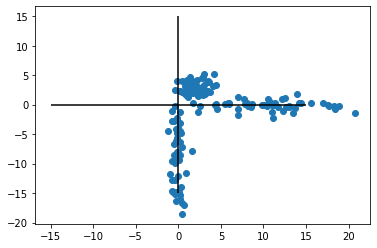

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

Uruchom DBSCAN

In [8]:
model = DBSCAN(eps=1.7, min_samples=2)

In [9]:
labels = model.fit_predict(points)

In [10]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  0,
        2,  2,  2,  2,  2,  3,  2,  3,  3,  2,  2,  3,  3,  3,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  0,  3,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        2,  3,  2,  3,  3,  3,  2,  3,  3,  3,  2,  3,  0,  2],
      dtype=int64)

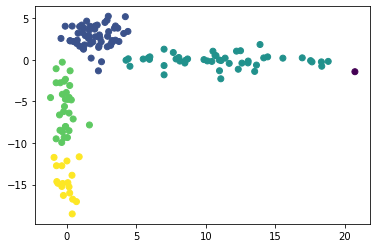

In [11]:
plt.scatter(points[:,0],points[:,1],c=labels+1)
plt.show()

In [15]:
from sklearn.neighbors import NearestNeighbors
?NearestNeighbors

In [14]:
neigh = NearestNeighbors(n_neighbors=4)

In [16]:
neigh.fit(points)

NearestNeighbors(n_neighbors=4)

In [17]:
distances, indices = neigh.kneighbors(points)

In [18]:
distances

array([[0.        , 0.23301385, 0.37271891, 0.54032489],
       [0.        , 0.1827288 , 0.62893407, 0.70014948],
       [0.        , 0.59482631, 0.66643478, 0.82759587],
       [0.        , 0.70896987, 0.7185717 , 0.95736816],
       [0.        , 0.17819289, 0.25273188, 0.32053012],
       [0.        , 0.27729463, 0.41296111, 0.42825092],
       [0.        , 0.24138058, 0.29832672, 0.32053012],
       [0.        , 0.3109854 , 0.41296111, 0.52443981],
       [0.        , 1.22826824, 1.32403708, 1.38432326],
       [0.        , 0.56503718, 0.58996167, 0.77541016],
       [0.        , 0.30543396, 0.6382747 , 0.7854183 ],
       [0.        , 0.23301385, 0.41442152, 0.59482631],
       [0.        , 0.32941734, 0.40304696, 0.5213671 ],
       [0.        , 0.2917614 , 0.41827367, 0.60161457],
       [0.        , 0.2841804 , 0.52443981, 0.60927674],
       [0.        , 0.86486257, 1.20378185, 1.32701248],
       [0.        , 0.02595181, 0.24840227, 0.5213671 ],
       [0.        , 0.56503718,

In [19]:
indices

array([[  0,  11,  30, 101],
       [  1,  31,  13,  35],
       [  2,  11,  47,   0],
       [  3,  16, 148, 125],
       [  4,  40,  36,   6],
       [  5,  38,   7,  19],
       [  6,  40,  26,   4],
       [  7,  38,   5,  14],
       [  8,  24,  29,  28],
       [  9,  17,  32,  22],
       [ 10,  28,  46,  24],
       [ 11,   0,  30,   2],
       [ 12, 125,  25,  16],
       [ 13,  45,  36,  31],
       [ 14,  42,   7,  35],
       [ 15,  58,  20,  39],
       [ 16, 148, 125,  12],
       [ 17,   9,  49,  40],
       [ 18,  27,  21,  47],
       [ 19,  34,   5,  30],
       [ 20,  39,  48,  43],
       [ 21,  18,  30,  47],
       [ 22,  33,  49,  17],
       [ 23,  44,  41,  32],
       [ 24,  28,  10,   8],
       [ 25, 125,  48,  12],
       [ 26,   6,   4,  40],
       [ 27,  46,  47,  18],
       [ 28,  10,  24,  29],
       [ 29,  32,  41,   9],
       [ 30,   0,  11,  21],
       [ 31,   1,  35,  13],
       [ 32,  41,  29,   9],
       [ 33,  49,  22,  38],
       [ 34,  

In [21]:
distances = distances[:,1:]
distances

array([[0.23301385, 0.37271891, 0.54032489],
       [0.1827288 , 0.62893407, 0.70014948],
       [0.59482631, 0.66643478, 0.82759587],
       [0.70896987, 0.7185717 , 0.95736816],
       [0.17819289, 0.25273188, 0.32053012],
       [0.27729463, 0.41296111, 0.42825092],
       [0.24138058, 0.29832672, 0.32053012],
       [0.3109854 , 0.41296111, 0.52443981],
       [1.22826824, 1.32403708, 1.38432326],
       [0.56503718, 0.58996167, 0.77541016],
       [0.30543396, 0.6382747 , 0.7854183 ],
       [0.23301385, 0.41442152, 0.59482631],
       [0.32941734, 0.40304696, 0.5213671 ],
       [0.2917614 , 0.41827367, 0.60161457],
       [0.2841804 , 0.52443981, 0.60927674],
       [0.86486257, 1.20378185, 1.32701248],
       [0.02595181, 0.24840227, 0.5213671 ],
       [0.56503718, 0.58533645, 0.61065683],
       [0.38203706, 0.4100328 , 0.48137499],
       [0.3296731 , 0.42825092, 0.52227744],
       [0.12588155, 0.45890474, 0.52027958],
       [0.4100328 , 0.44118495, 0.46071112],
       [0.

In [23]:
avg_distances = np.mean(distances, axis=1)
avg_distances

array([0.38201922, 0.50393745, 0.69628566, 0.79496991, 0.25048496,
       0.37283555, 0.28674581, 0.41612877, 1.31220953, 0.64346967,
       0.57637565, 0.41408723, 0.4179438 , 0.43721654, 0.47263232,
       1.13188563, 0.26524039, 0.58701015, 0.42448162, 0.42673382,
       0.36835529, 0.43730963, 0.44918085, 0.75878255, 0.83496532,
       0.37889205, 0.42718138, 0.3116593 , 0.57029742, 0.47505315,
       0.40944179, 0.43430029, 0.36907587, 0.39771793, 0.55281795,
       0.52949983, 0.28052569, 0.91122317, 0.34990932, 0.29309305,
       0.27945722, 0.44160277, 0.4616321 , 0.40893182, 0.69774598,
       0.29310869, 0.4146039 , 0.43625848, 0.37189567, 0.39824641,
       1.0391147 , 1.60008034, 0.61545607, 1.11105283, 0.92432662,
       0.76704625, 0.3421238 , 1.29432228, 1.24032342, 2.48308663,
       0.42451292, 0.41165012, 0.80402485, 0.89682981, 0.5776191 ,
       0.99095256, 0.25296023, 0.83304606, 1.20317368, 0.56556858,
       0.46508518, 0.97993424, 0.50333364, 1.02559005, 0.46148

In [25]:
sorted_avg_distances = np.sort(avg_distances)
sorted_avg_distances

array([0.23312063, 0.25048496, 0.25296023, 0.26402862, 0.26524039,
       0.27269766, 0.27945722, 0.28052569, 0.28674581, 0.29309305,
       0.29310869, 0.3116593 , 0.31812661, 0.3191798 , 0.31918683,
       0.32121062, 0.3421238 , 0.347258  , 0.34805896, 0.34990932,
       0.3640998 , 0.36835529, 0.36907587, 0.37189567, 0.37283555,
       0.37889205, 0.38201922, 0.3889934 , 0.39136687, 0.39288211,
       0.39771793, 0.39824641, 0.40059368, 0.40077848, 0.40173583,
       0.40757317, 0.40893182, 0.4093278 , 0.40944179, 0.41165012,
       0.41408723, 0.4146039 , 0.41612877, 0.4179438 , 0.42448162,
       0.42451292, 0.42673382, 0.42718138, 0.43137997, 0.43430029,
       0.43625848, 0.43721654, 0.43730963, 0.44160277, 0.44238343,
       0.44542025, 0.44918085, 0.45196093, 0.46148086, 0.4616321 ,
       0.46442192, 0.46508518, 0.47263232, 0.47369393, 0.47505315,
       0.48485414, 0.48731903, 0.49530285, 0.50020025, 0.50333364,
       0.50393745, 0.50767637, 0.51574282, 0.52907844, 0.52949

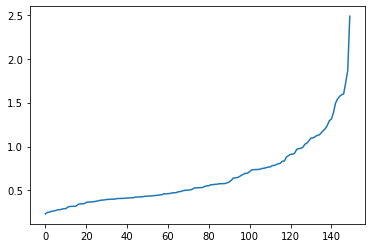

In [26]:
plt.plot(sorted_avg_distances)

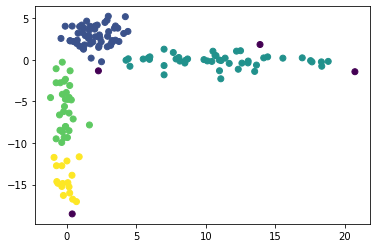

In [32]:
model = DBSCAN(eps=1.4, min_samples=4)
labels = model.fit_predict(points)
plt.scatter(points[:,0],points[:,1],c=labels+1)
plt.show()

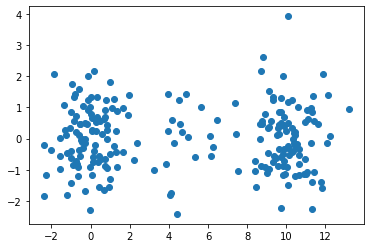

In [33]:
rnd.seed(12345)
data = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),100),
                    rnd.multivariate_normal((5,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((10,0),np.array([[1,0],[0,1]]),100)],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

Spróbuj tak dobrać parametry, żeby wykryć 2 grupy (bardziej zwarte części z rysunku)

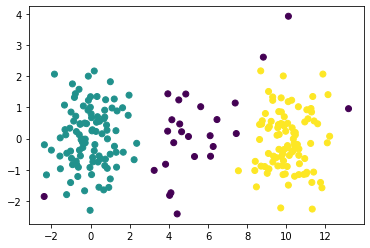

In [34]:
model = DBSCAN(eps=1, min_samples=9)
labels = model.fit_predict(data)
plt.scatter(data[:,0],data[:,1],c=labels+1)
plt.show()

In [ ]:
# rekomendowane parametry

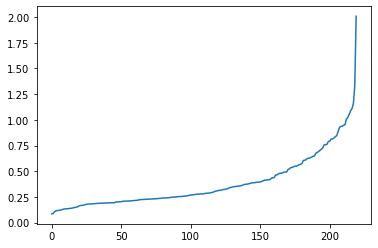

In [37]:
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(data)
distances, indices = neigh.kneighbors(data)
distances = distances[:,1:]
avg_distances = np.mean(distances, axis=1)
sorted_avg_distances = np.sort(avg_distances)
plt.plot(sorted_avg_distances)

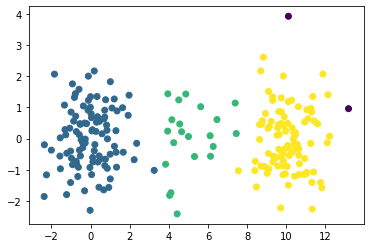

In [39]:
model = DBSCAN(eps=1.1, min_samples=4)
labels = model.fit_predict(data)
plt.scatter(data[:,0],data[:,1],c=labels+1)
plt.show()

### Analiza skupień na danych przestrzennych

In [40]:
import pandas as pd

dane = pd.read_csv("Data/summer-travel-gps-full_okrojone.csv")
dane.head()

,lat,lon,date
0,51.481292,-0.451011,05/14/2014 09:07
1,51.474005,-0.450999,05/14/2014 09:22
2,51.478199,-0.446081,05/14/2014 10:51
3,51.478199,-0.446081,05/14/2014 11:24
4,51.474146,-0.451562,05/14/2014 11:38


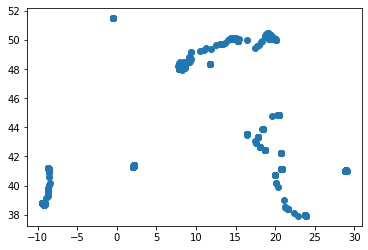

In [41]:
plt.scatter(dane.iloc[:,1],dane.iloc[:,0])
plt.show()

#### Zadanie: wykrycie istotnych punktów podróży (w uproszczeniu miejsc, gdzie przebywaliśmy dłużej)

Zwizualizować wyniki.

Ściągnąć współrzedne miast europejskich z http://www.clearlyandsimply.com/clearly_and_simply/2010/10/geocoding-databases-for-europe.html i przyporządkować miasta do punktów.

In [42]:
dane.shape

(1759, 3)

In [43]:
X = dane[['lat','lon']]
X

,lat,lon
0,51.481292,-0.451011
1,51.474005,-0.450999
2,51.478199,-0.446081
3,51.478199,-0.446081
4,51.474146,-0.451562
...,...,...
1754,48.356013,11.791710
1755,48.356528,11.792183
1756,48.356285,11.791710
1757,48.355328,11.791710


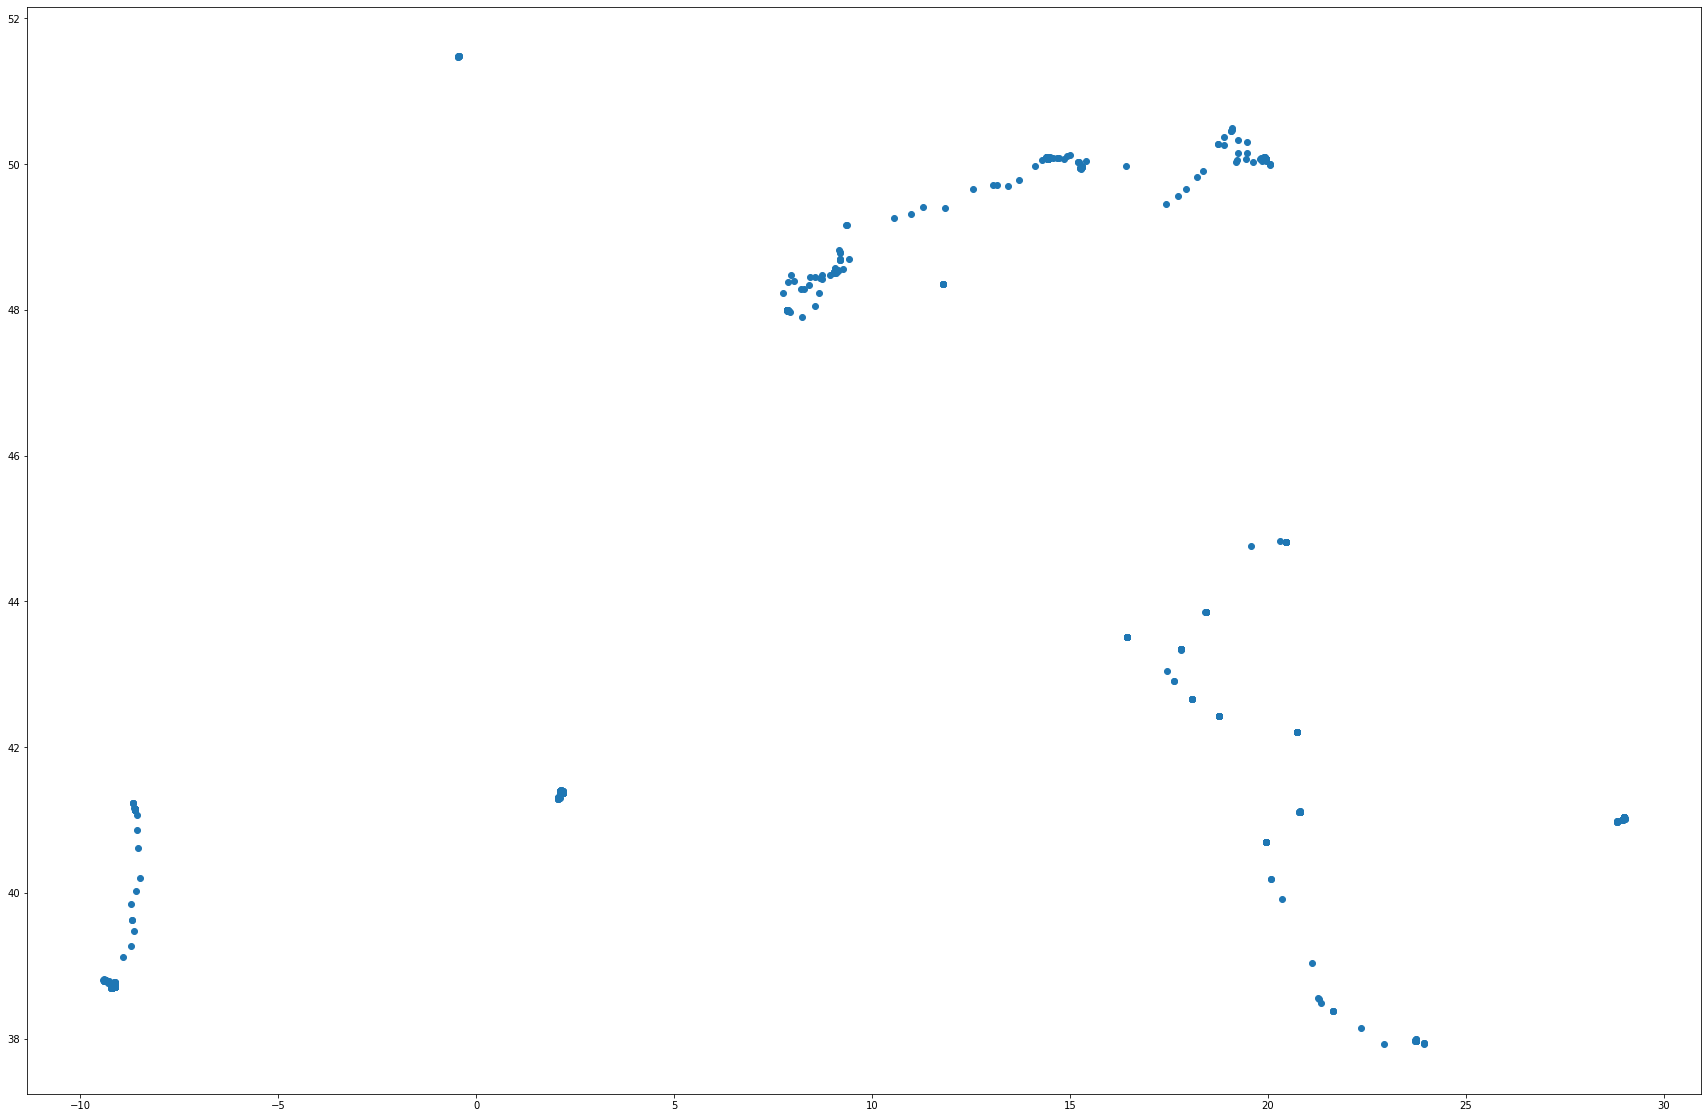

In [45]:
plt.figure(figsize=(30,20))
plt.scatter(dane.lon,dane.lat)
plt.show()

In [56]:
?DBSCAN

In [69]:
model = DBSCAN(eps=0.1, min_samples=40)
model.fit(X)

DBSCAN(eps=0.1, min_samples=40)

In [70]:
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [71]:
np.unique(model.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([308, 160,  73, 646,  85,  95, 133,  54,  51,  67,  87], dtype=int64))

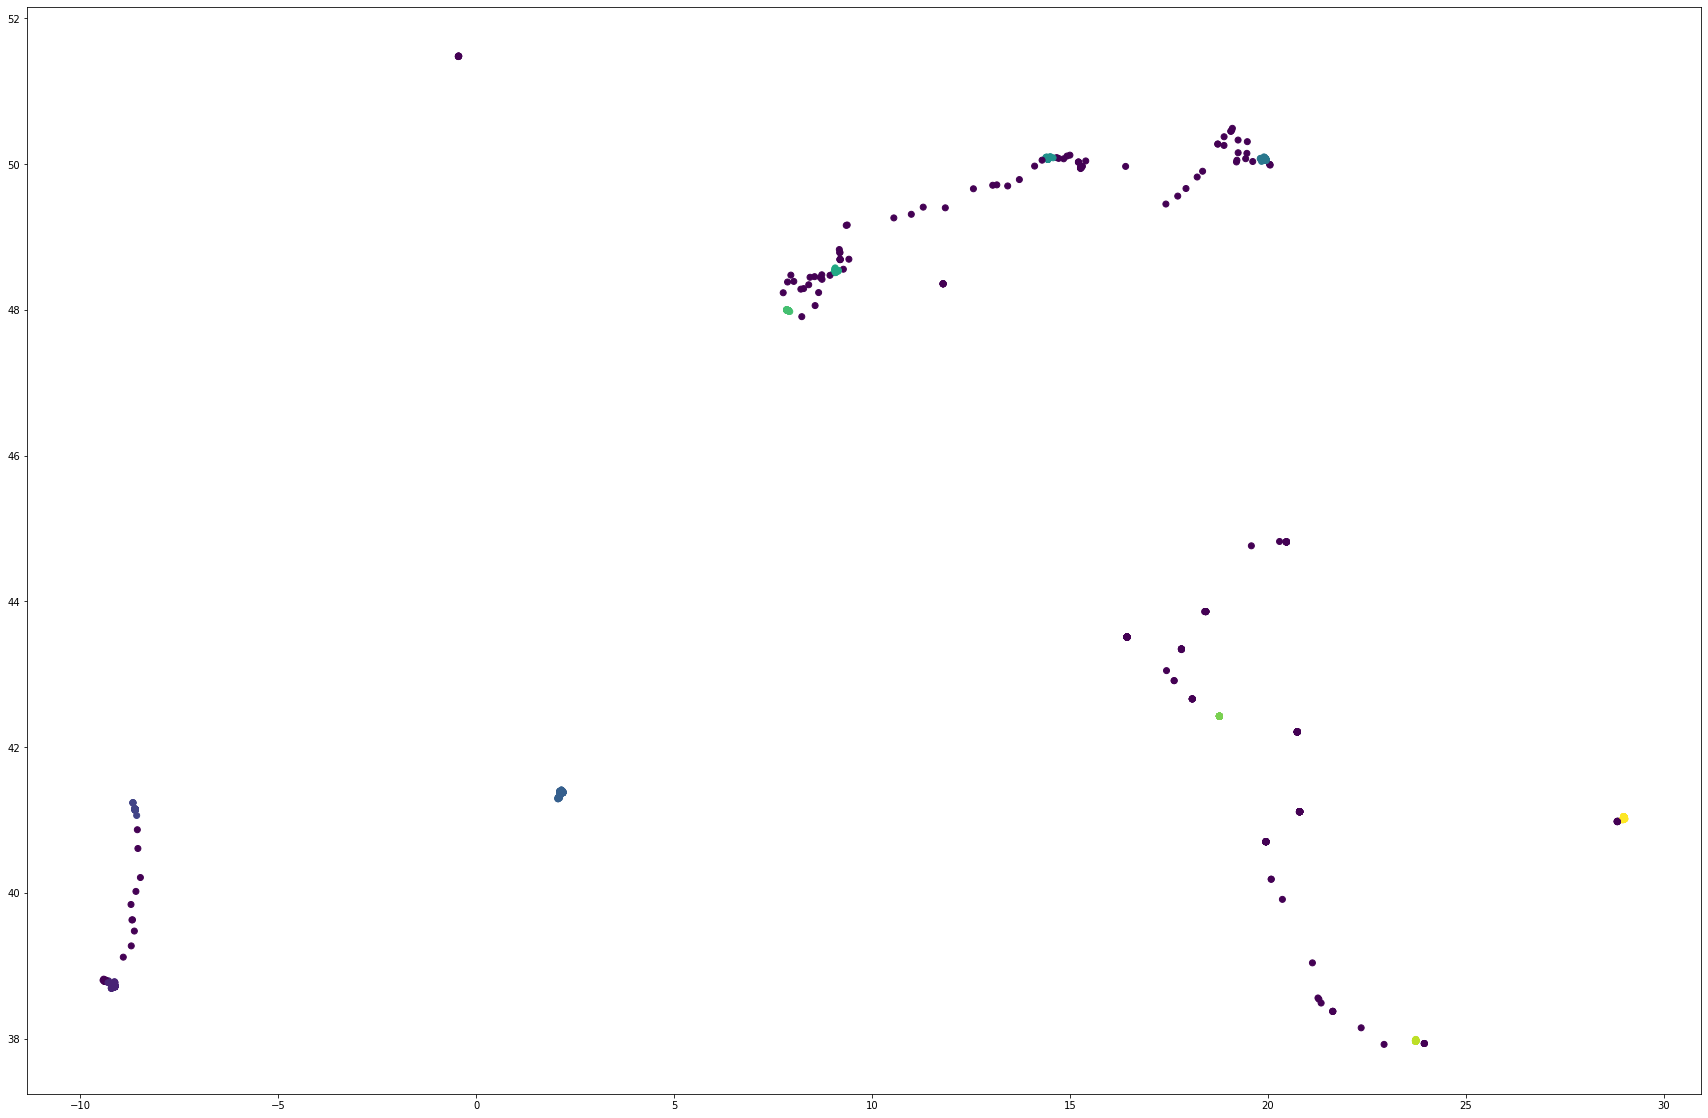

In [72]:
plt.figure(figsize=(30,20))
plt.scatter(dane.lon,dane.lat,c=model.labels_)
plt.show()

In [73]:
dane[model.labels_ == 2]

,lat,lon,date
263,41.303911,2.105931,05/18/2014 22:35
264,41.292723,2.075583,05/18/2014 22:49
265,41.289946,2.064590,05/18/2014 23:04
266,41.294143,2.073177,05/18/2014 23:20
267,41.320125,2.090935,05/18/2014 23:34
...,...,...,...
1357,41.378799,2.151818,06/20/2014 18:00
1358,41.376331,2.150316,06/20/2014 18:14
1359,41.302957,2.075222,06/20/2014 18:59
1360,41.294760,2.059722,06/20/2014 22:15


In [ ]:
# dalsze kroki
# 1. wczytujemy plik z miastami
# 2. wyliczenie sredniej dlugosci i szerokosci geograficznej dla klastrow
# 3. mapujemy srednia dlugosc i szerokosc geograficzna dla znalezionych klastrow na miasta
# 4. wizualizacja - zaznaczmy ktore klastry odpowiadaja poszczegolnym miastom

In [ ]:
# 1. wczytanie pliku z miastami (european_cities_*.csv)
# 2. wyliczenie sredniej dlugosci i szerokosci geograficznej dla klastrow

In [75]:
# 1.
cities = pd.read_csv("Data/european_cities_eu_standard.csv", decimal=",", sep=";")
cities

,European City,Country (ISO 3166-2),Latitude,Longitude
0,Andorra la Vella,AD,42.50000,1.5000
1,Canillo,AD,42.58330,1.6667
2,Encamp,AD,42.53330,1.6333
3,Escaldes-Engordany,AD,42.50000,1.5667
4,La Massana,AD,42.56670,1.4833
...,...,...,...,...
252776,zkonak,TR,37.43750,42.1908
252777,zml,TR,39.20365,35.8335
252778,Zonguldak,TR,41.45560,31.7897
252779,zpinar,TR,37.93410,42.3046


In [ ]:
# 2.

In [77]:
dane.groupby(model.labels_).mean()

,lat,lon
-1,44.229301,15.499130
0,38.714959,-9.146195
1,41.147990,-8.614548
2,41.381009,2.156992
3,50.061723,19.931725
4,50.077716,14.440023
5,48.523039,9.056752
6,47.991538,7.864605
7,42.423492,18.771581
8,37.969904,23.728642


In [ ]:
# 3. mapujemy srednia dlugosc i szerokosc geograficzna dla znalezionych klastrow na miasta

In [78]:
dane.groupby(model.labels_).mean().drop(-1) # odrzucamy szum

,lat,lon
0,38.714959,-9.146195
1,41.147990,-8.614548
2,41.381009,2.156992
3,50.061723,19.931725
4,50.077716,14.440023
5,48.523039,9.056752
6,47.991538,7.864605
7,42.423492,18.771581
8,37.969904,23.728642
9,41.032368,28.982397


In [80]:
cities[['Latitude','Longitude']]

,Latitude,Longitude
0,42.50000,1.5000
1,42.58330,1.6667
2,42.53330,1.6333
3,42.50000,1.5667
4,42.56670,1.4833
...,...,...
252776,37.43750,42.1908
252777,39.20365,35.8335
252778,41.45560,31.7897
252779,37.93410,42.3046


In [81]:
from sklearn.metrics import pairwise_distances_argmin

In [82]:
?pairwise_distances_argmin

In [83]:
pairwise_distances_argmin(dane.groupby(model.labels_).mean().drop(-1),cities[['Latitude','Longitude']])

array([231881, 237841,  74504, 218587,  54324,  66775,  58326, 190987,
       251794, 252168], dtype=int64)

In [84]:
cities["European City"].iloc[pairwise_distances_argmin(dane.groupby(model.labels_).mean().drop(-1),cities[['Latitude','Longitude']])]

231881                  Lisboa
237841                   Porto
74504                Barcelona
218587                   Krakw
54324                Vinohrady
66775                  Tbingen
58326     Freiburg im Breisgau
190987               Vitaljina
251794                   Cesme
252168                Istanbul
Name: European City, dtype: object

In [ ]:
# 4. wizualizacja - zaznaczmy ktore klastry odpowiadaja poszczegolnym miastom

In [89]:
sel_cities = cities["European City"].iloc[pairwise_distances_argmin(dane.groupby(model.labels_).mean().drop(-1),cities[['Latitude','Longitude']])]
sel_cities

231881                  Lisboa
237841                   Porto
74504                Barcelona
218587                   Krakw
54324                Vinohrady
66775                  Tbingen
58326     Freiburg im Breisgau
190987               Vitaljina
251794                   Cesme
252168                Istanbul
Name: European City, dtype: object

In [87]:
dane[model.labels_ == 0]['lon']

7     -9.137544
8     -9.129195
9     -9.128911
10    -9.124403
11    -9.147780
         ...   
175   -9.141158
176   -9.169380
177   -9.165694
178   -9.165713
179   -9.165688
Name: lon, Length: 160, dtype: float64

In [88]:
np.unique(model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

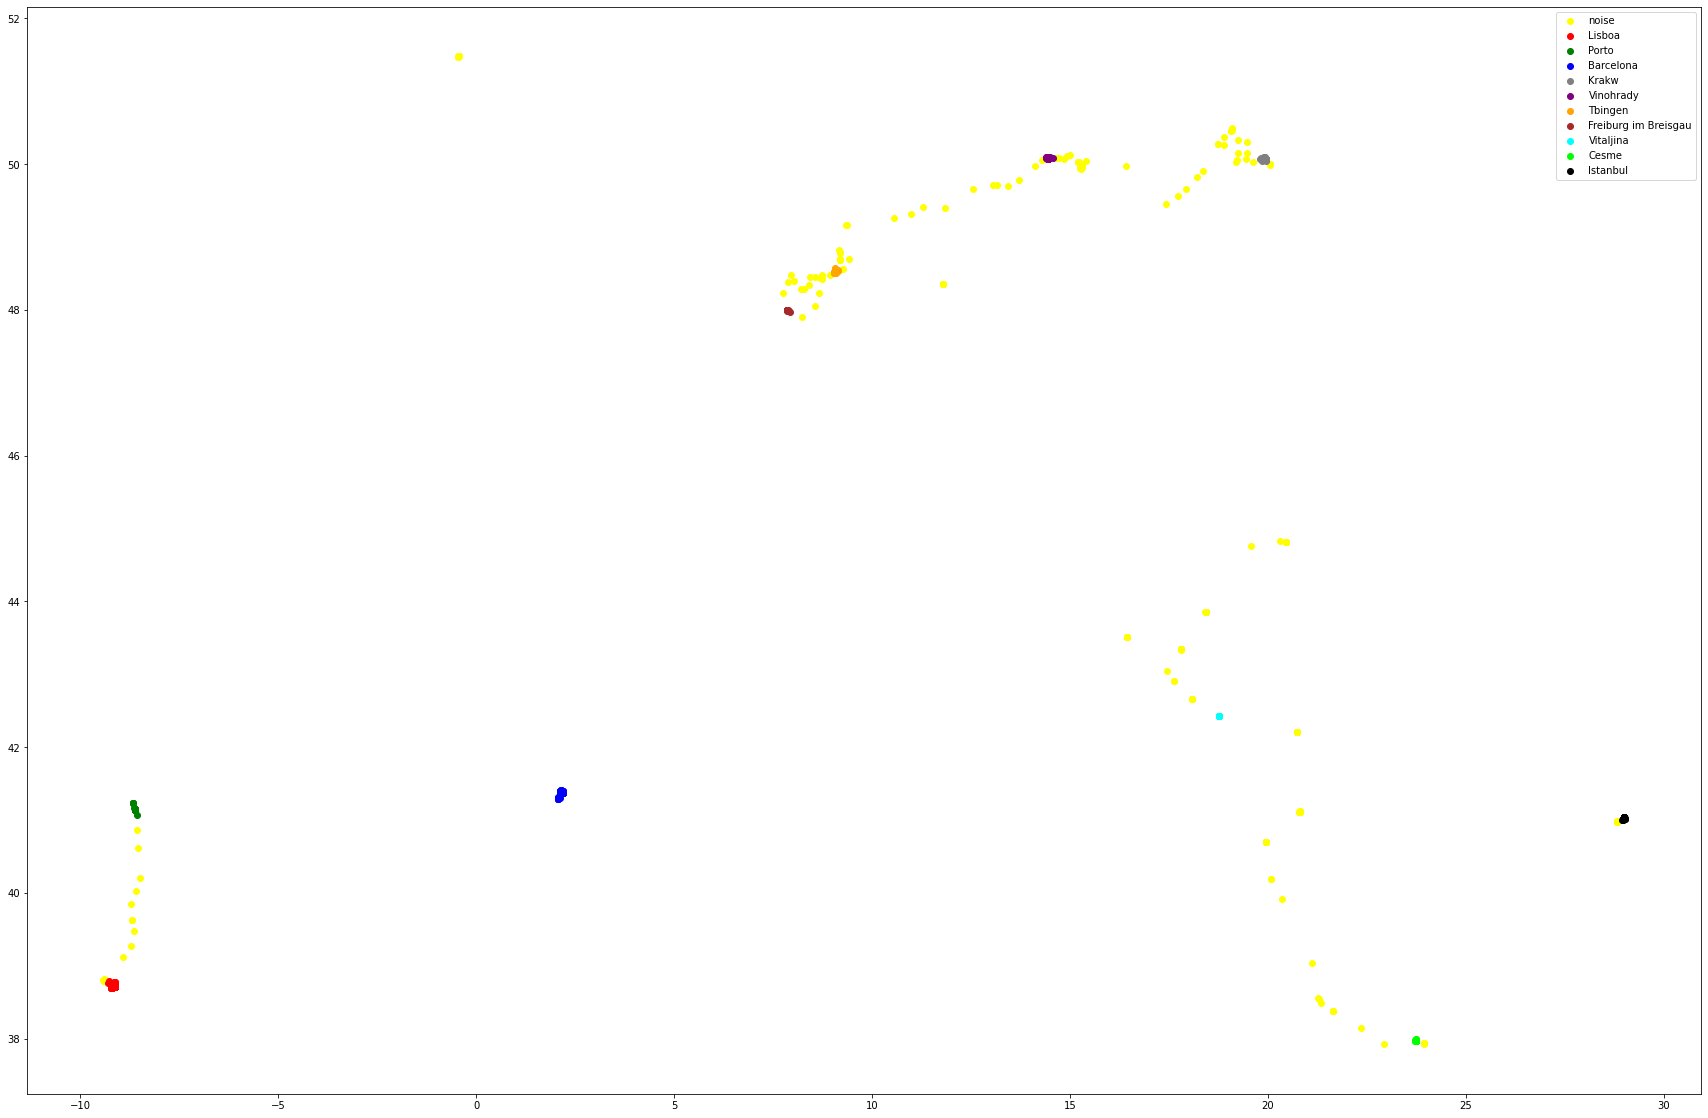

In [93]:
plt.figure(figsize=(30,20))

colors = np.array(["red","green","blue","grey","purple","orange","brown","cyan","lime","black","yellow"])
for i in np.unique(model.labels_):
    city = sel_cities.iloc[i] if i>=0 else "noise"
    plt.scatter(dane[model.labels_ == i]['lon'], dane[model.labels_ == i]['lat'], c=colors[i], label=city)

plt.legend()
plt.show()

## Birch

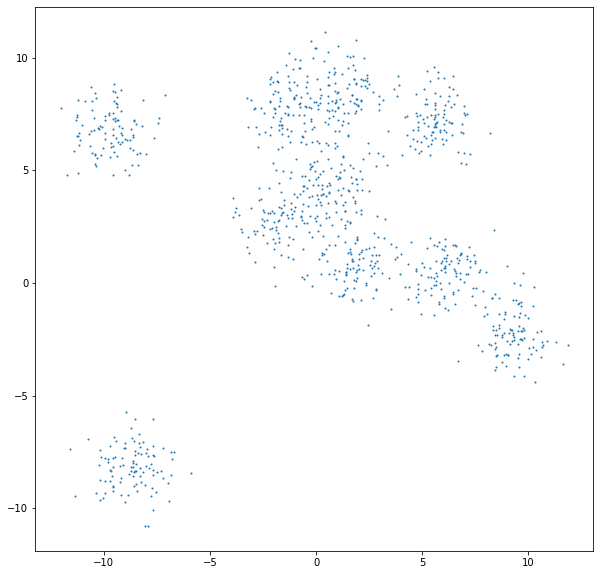

In [94]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(1000, centers=10,random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

In [95]:
from sklearn.cluster import Birch
?Birch

In [96]:
from sklearn.cluster import Birch

b = Birch(threshold=1,n_clusters=None)
b.fit(data)

Birch(n_clusters=None, threshold=1)

In [97]:
b.subcluster_centers_

array([[  0.65699291,   8.00069438],
       [ -1.35867618,   2.55794936],
       [  0.3614498 ,   5.46440057],
       [  5.58257078,   0.29396862],
       [  0.25882045,   0.80899775],
       [  2.15510663,   2.1101151 ],
       [  7.31950896,   0.40489509],
       [  5.97039481,   7.91377766],
       [ -8.01415614,  -8.15111027],
       [ -9.71866948,   7.4970512 ],
       [  9.13401918,  -1.84849862],
       [  1.94821493,   4.69619738],
       [  1.94787564,   0.31134485],
       [  0.21674859,   3.64408369],
       [-10.11383596,   5.57292216],
       [ -1.50053598,   7.38181111],
       [  4.73076823,   6.64346277],
       [  5.9722929 ,   6.75365535],
       [ -9.89306681,  -8.44840359],
       [  2.19256109,   8.50320131],
       [ -8.6473362 ,   6.47515474],
       [ -8.78313524,  -6.79335004],
       [  4.15524325,   0.38318576],
       [  0.93226682,  10.06432171],
       [  6.20390339,   1.32105268],
       [  5.1467883 ,   9.08128783],
       [ -1.249771  ,   9.09356363],
 

In [98]:
len(b.subcluster_centers_)

40

In [99]:
b.subcluster_labels_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

Zwizualizuj wyniki (podgrupy Birch)

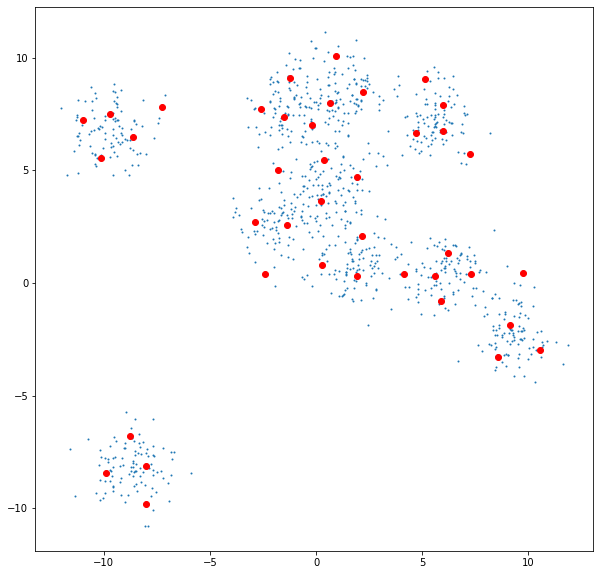

In [101]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1],c="red")
plt.show()

Uruchom KMeans na środkach podgrup z Birch i zwizualizuj.

In [102]:
from sklearn.cluster import KMeans

In [103]:
km = KMeans(n_clusters=10)

In [104]:
km.fit(b.subcluster_centers_)
km.labels_

array([6, 8, 1, 7, 4, 4, 7, 3, 2, 5, 0, 1, 4, 1, 5, 9, 3, 3, 2, 6, 5, 2,
       4, 6, 7, 3, 9, 8, 3, 1, 0, 5, 7, 6, 2, 5, 0, 9, 8, 7])

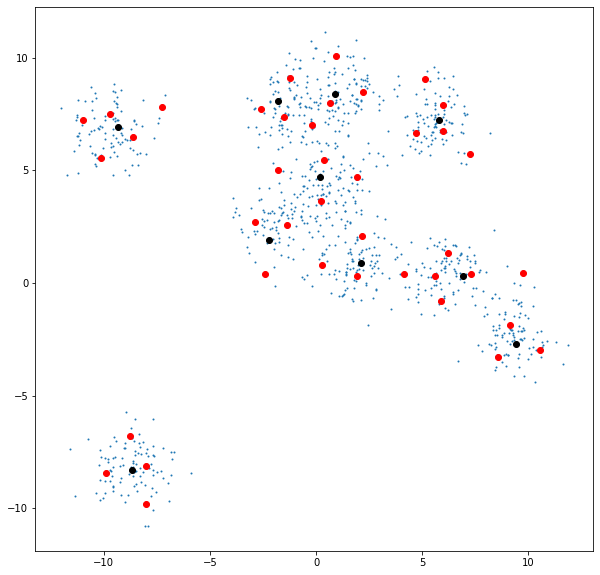

In [105]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1],c="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="black")
plt.show()

Uruchom Birch z KMeans jako klasteryzacją w kolejnym etapie

In [106]:
?Birch

In [107]:
b = Birch(threshold=1,n_clusters=KMeans(n_clusters=10))
b.fit(data)

Birch(n_clusters=KMeans(n_clusters=10), threshold=1)

In [108]:
b.subcluster_labels_

array([9, 8, 6, 1, 7, 7, 1, 4, 2, 0, 5, 6, 7, 6, 0, 3, 4, 4, 2, 9, 0, 2,
       1, 9, 1, 4, 3, 8, 4, 6, 5, 0, 1, 3, 2, 0, 5, 3, 8, 5])

Pokoloruj środki podgrup Birch wg ich przyporządkowania do klastrów KMeans

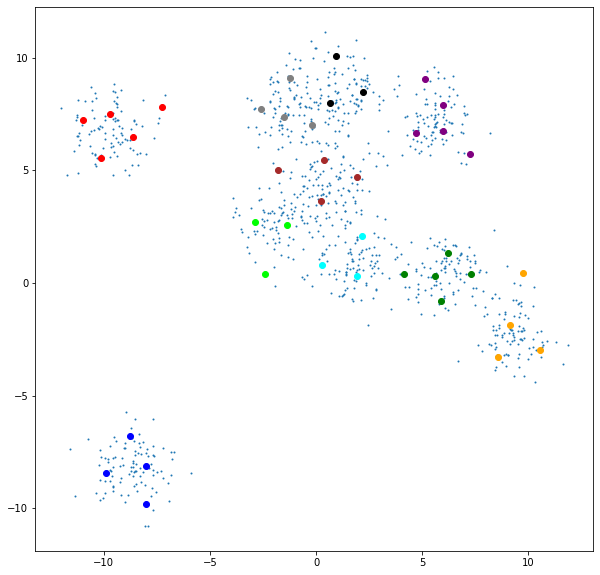

In [111]:
colors = np.array(["red","green","blue","grey","purple","orange","brown","cyan","lime","black","yellow"])
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)

for k in np.unique(b.subcluster_labels_):
    filtr = b.subcluster_labels_ == k
    plt.scatter(b.subcluster_centers_[filtr,0],b.subcluster_centers_[filtr,1],c=colors[k])
plt.show()

## Case study - grupowanie wejść na stronę

Opis formatu danych https://kdd.ics.uci.edu/databases/msnbc/description.txt

In [112]:
data_raw = pd.read_csv("Data/msnbc990928.seq",skiprows=3)
data_raw.head()

,% Sequences:
0,1 1
1,2
2,3 2 2 4 2 2 2 3 3
3,5
4,1


In [113]:
pd.read_csv("Data/msnbc990928.seq")

,% Different categories found in input file:
0,frontpage news tech local opinion on-air misc ...
1,% Sequences:
2,1 1
3,2
4,3 2 2 4 2 2 2 3 3
...,...
989815,9 9 9 9 9 9 9 9
989816,1 2
989817,1 1 1 1
989818,1 1 1 1 1 1 1


In [114]:
category = pd.read_csv("Data/msnbc990928.seq").loc[0][0].split()
category

['frontpage',
 'news',
 'tech',
 'local',
 'opinion',
 'on-air',
 'misc',
 'weather',
 'msn-news',
 'health',
 'living',
 'business',
 'msn-sports',
 'sports',
 'summary',
 'bbs',
 'travel']

Przeprowadź klastrowanie - przygotuj odpowiednio dane, zwróć uwagę na przypadki odstające

In [ ]:
# tworzymy postac tabelaryczna dla danych, kolumny to poszczegolne kategorie

In [115]:
import re

In [116]:
re.findall('\\b\w+\\b','1 1 4 10 5')

['1', '1', '4', '10', '5']

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

In [118]:
?CountVectorizer

In [119]:
cv = CountVectorizer(token_pattern='\\b\w+\\b')

In [120]:
data_raw["% Sequences:"]

0                       1 1 
1                         2 
2         3 2 2 4 2 2 2 3 3 
3                         5 
4                         1 
                 ...        
989813      9 9 9 9 9 9 9 9 
989814                  1 2 
989815              1 1 1 1 
989816        1 1 1 1 1 1 1 
989817                    6 
Name: % Sequences:, Length: 989818, dtype: object

In [122]:
cv.fit(data_raw["% Sequences:"])

CountVectorizer(token_pattern='\\b\\w+\\b')

In [123]:
cv.vocabulary_

{'1': 0,
 '2': 9,
 '3': 10,
 '4': 11,
 '5': 12,
 '6': 13,
 '7': 14,
 '8': 15,
 '9': 16,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '16': 7,
 '17': 8}

In [124]:
?CountVectorizer

In [126]:
vocab = {str(i): i-1 for i in range(1,len(category)+1)}
vocab

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 '10': 9,
 '11': 10,
 '12': 11,
 '13': 12,
 '14': 13,
 '15': 14,
 '16': 15,
 '17': 16}

In [127]:
cv = CountVectorizer(token_pattern='\\b\w+\\b',vocabulary=vocab)

In [128]:
data = cv.fit_transform(data_raw["% Sequences:"])

In [130]:
data.todense()

matrix([[2, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 5, 3, ..., 0, 0, 0],
        ...,
        [4, 0, 0, ..., 0, 0, 0],
        [7, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [131]:
cv.get_feature_names_out()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17'], dtype=object)

In [133]:
[int(x)-1 for x in cv.get_feature_names_out()]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [134]:
np.array(category)[[int(x)-1 for x in cv.get_feature_names_out()]]

array(['frontpage', 'news', 'tech', 'local', 'opinion', 'on-air', 'misc',
       'weather', 'msn-news', 'health', 'living', 'business',
       'msn-sports', 'sports', 'summary', 'bbs', 'travel'], dtype='<U10')

In [136]:
data = pd.DataFrame(data.todense(), columns=np.array(category)[[int(x)-1 for x in cv.get_feature_names_out()]])
data

,frontpage,news,tech,local,opinion,on-air,misc,weather,msn-news,health,living,business,msn-sports,sports,summary,bbs,travel
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989813,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0
989814,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
989815,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
989816,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# filtrowanie danych

In [137]:
data.sum(axis=1) # ile przejrzelismy stron

0         2
1         1
2         9
3         1
4         1
         ..
989813    8
989814    2
989815    4
989816    7
989817    1
Length: 989818, dtype: int64

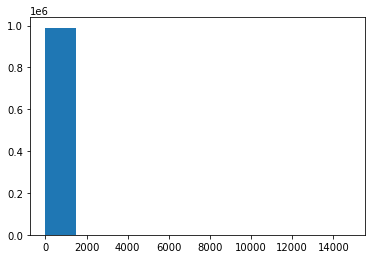

In [138]:
plt.hist(data.sum(axis=1))
plt.show()

In [142]:
(data.sum(axis=1)<50).mean()

0.9970105615375756

In [144]:
data = data[data.sum(axis=1)<50] # odrzucamy uzytkownikow ktorzy bardzo duza liczbe stron
data.shape

(986859, 17)

In [ ]:
# odrzucamy uzytkownikow, ktorzy ogladali tylko strone glowna

In [148]:
data[data.iloc[:,1:].sum(axis=1) == 0].shape

(109697, 17)

In [150]:
data = data[data.iloc[:,1:].sum(axis=1) > 0]
data.shape

(877162, 17)

In [152]:
data[data.sum(axis=1) == 1].shape

(307883, 17)

In [154]:
data = data[data.sum(axis=1) > 1] # odrzucamy uzytkownikow, ktorzy weszli tylko raz na nasza strone
data.shape

(569279, 17)

In [155]:
data

,frontpage,news,tech,local,opinion,on-air,misc,weather,msn-news,health,living,business,msn-sports,sports,summary,bbs,travel
2,0,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,3,3,4,0,0,0,0,0,0,0,0,0
9,0,0,1,6,1,1,0,0,1,3,0,0,0,0,0,0,0
10,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989806,0,3,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
989809,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
989811,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
989813,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0


In [156]:
from sklearn.preprocessing import Normalizer

In [157]:
?Normalizer

In [158]:
data2 = Normalizer("l1").fit_transform(data)
data2

array([[0.        , 0.55555556, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07692308, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.88888889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [160]:
data2 = pd.DataFrame(data2, columns=category)
data2

,frontpage,news,tech,local,opinion,on-air,misc,weather,msn-news,health,living,business,msn-sports,sports,summary,bbs,travel
0,0.000000,0.555556,0.333333,0.111111,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.3,0.4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.076923,0.461538,0.076923,0.076923,0.0,0.0,0.076923,0.230769,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569274,0.000000,0.272727,0.000000,0.727273,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
569275,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
569276,0.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0
569277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [161]:
from yellowbrick.cluster import KElbowVisualizer

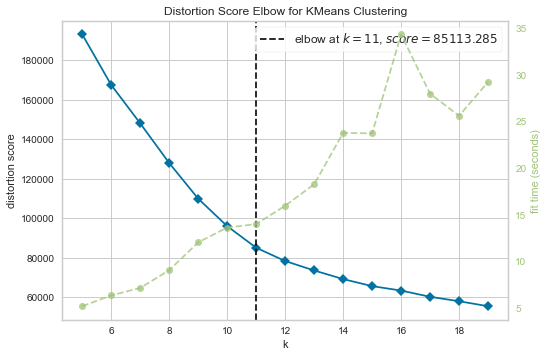

In [162]:
vis = KElbowVisualizer(KMeans(),k=(5,20))
vis.fit(data2)
vis.show()

In [163]:
from sklearn.cluster import MiniBatchKMeans
?MiniBatchKMeans

C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the enviro

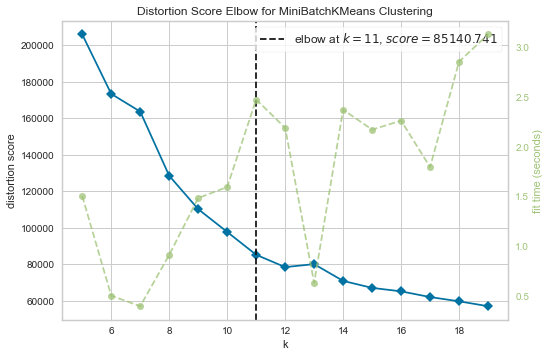

In [164]:
vis = KElbowVisualizer(MiniBatchKMeans(),k=(5,20))
vis.fit(data2)
vis.show()

In [165]:
mbk = MiniBatchKMeans(n_clusters=11)
mbk.fit(data2)

C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=11)

In [166]:
mbk.cluster_centers_

array([[6.66348965e-02, 7.73230173e-01, 1.67030730e-02, 1.38903353e-02,
        6.19463774e-03, 1.54296390e-02, 6.43544918e-03, 1.32897888e-02,
        7.48531200e-03, 1.60921549e-02, 1.18851262e-02, 2.15080784e-02,
        4.06173842e-04, 1.59319811e-02, 1.16893381e-02, 0.00000000e+00,
        3.19384245e-03],
       [4.96868909e-02, 4.49169893e-02, 1.84027870e-02, 3.58284429e-01,
        6.37825075e-02, 4.06325013e-02, 1.18218547e-01, 2.01923992e-02,
        4.17531774e-02, 8.48891476e-02, 5.74228430e-02, 1.78445665e-02,
        1.47997069e-02, 2.63281785e-02, 3.22562365e-02, 3.35174312e-03,
        7.23734948e-03],
       [1.39180153e-02, 1.36613544e-02, 3.07472945e-03, 7.93580958e-03,
        1.34907259e-03, 1.07418660e-02, 3.50352140e-03, 9.14643832e-01,
        7.41455291e-03, 2.27908003e-03, 3.13185011e-03, 5.41370811e-03,
        5.66158499e-03, 5.73819138e-03, 9.27167946e-04, 3.61141206e-04,
        2.44522692e-04],
       [3.75264863e-01, 5.17657667e-02, 2.81206616e-02, 1.042

In [169]:
np.unique(mbk.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 51710,  91012,  56263,  22111,  40805,  67671,  49498,  32610,
         21190,  33251, 103158], dtype=int64))

In [170]:
import seaborn as sns

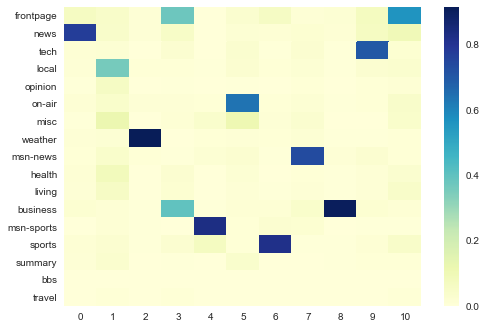

In [174]:
sns.heatmap(pd.DataFrame(mbk.cluster_centers_, columns=category).T,cmap='YlGnBu')

### Klasteryzacja obrazów

In [175]:
from sklearn.datasets import fetch_openml

fmnist = fetch_openml('Fashion-MNIST')
fmnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

![Fashion MNIST](https://miro.medium.com/max/788/1*ogbAotjStIKLG4TyLzzDtQ.png)

In [176]:
fmnist.data.shape

(70000, 784)

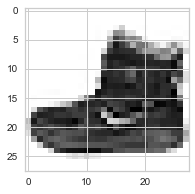

In [187]:
plt.figure(figsize=(3,3))
plt.imshow(fmnist.data.iloc[0,:].values.reshape(28,28))

Zrób klasteryzację KMeans bezpośrednio na danych oraz z użyciem PCA. Porównaj wyniki z użyciem V-measure.

In [188]:
mbk = MiniBatchKMeans(n_clusters=10)

In [189]:
groups = mbk.fit_predict(fmnist.data)

C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [190]:
groups

array([3, 8, 1, ..., 1, 4, 7])

In [191]:
from sklearn.metrics import v_measure_score

In [192]:
v_measure_score(fmnist.target, groups)

0.52695565392196

Zwizualizuj kilka przykładów z poszczególnych klastrów.

In [193]:
cluster_index = [[] for i in range(10)]
cluster_index

[[], [], [], [], [], [], [], [], [], []]

In [194]:
for i, label in enumerate(groups):
    cluster_index[label].append(i)

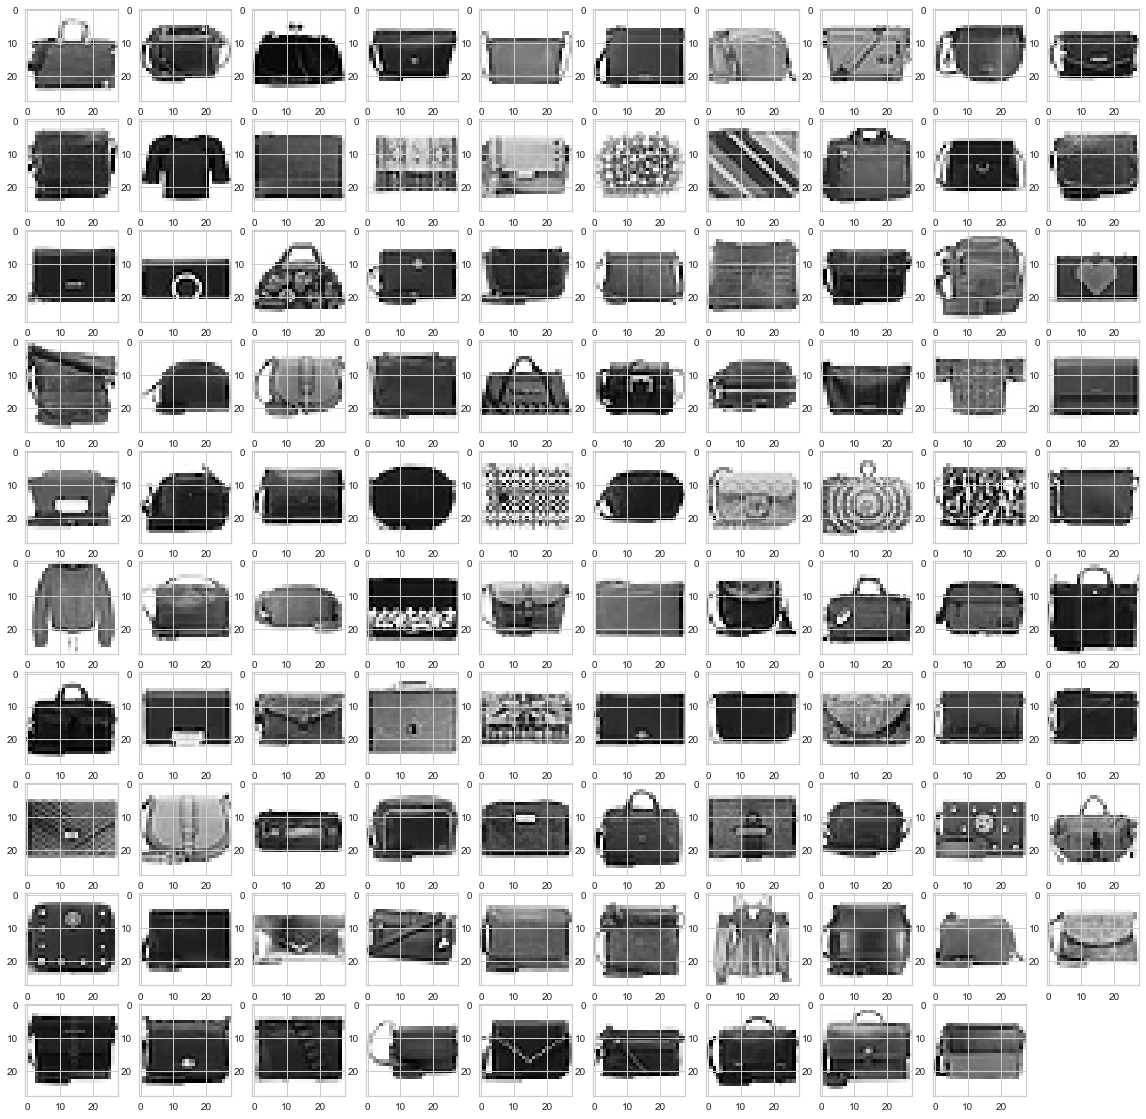

In [200]:
cluster_no = 2
num = 100

plt.figure(figsize=(20,20))

for i in range(1, num):
    plt.subplot(10,10,i)
    plt.imshow(fmnist.data.iloc[cluster_index[cluster_no][i],:].values.reshape(28,28))

plt.show()

Zrób rozkład dla każdego klastra ile obiektów poszczególnych klas zawiera

In [201]:
class_names = {0:'tshirt',1:'trouser',2:'pullover',3:'dress',4:'coat',5:'sandals',6:'shirt',7:'sneaker',8:'bag',9:'ankle boots'}

In [202]:
cluster_target = [[] for i in range(10)]

In [206]:
for i in range(10):
    target_occurences = fmnist.target[cluster_index[i]]
    elements, counts = np.unique(target_occurences, return_counts=True)
    elements_names = [class_names[int(x)] for x in elements]
    cluster_target[i] = dict(zip(elements_names, counts))

In [207]:
cluster_target

[{'tshirt': 580,
  'trouser': 294,
  'pullover': 370,
  'dress': 1909,
  'coat': 1655,
  'sandals': 2,
  'shirt': 660,
  'bag': 39,
  'ankle boots': 9},
 {'tshirt': 2152,
  'trouser': 472,
  'pullover': 2201,
  'dress': 1401,
  'coat': 1111,
  'sandals': 1213,
  'shirt': 2831,
  'sneaker': 3,
  'bag': 708,
  'ankle boots': 121},
 {'tshirt': 30,
  'trouser': 4,
  'pullover': 39,
  'dress': 6,
  'coat': 18,
  'sandals': 4,
  'shirt': 81,
  'sneaker': 1,
  'bag': 2572,
  'ankle boots': 4},
 {'sandals': 339, 'shirt': 1, 'sneaker': 29, 'bag': 7, 'ankle boots': 3224},
 {'tshirt': 248,
  'trouser': 6149,
  'pullover': 10,
  'dress': 3517,
  'coat': 137,
  'sandals': 1,
  'shirt': 87,
  'bag': 17,
  'ankle boots': 3},
 {'sandals': 793, 'shirt': 1, 'sneaker': 1208, 'bag': 93, 'ankle boots': 3471},
 {'tshirt': 34,
  'pullover': 43,
  'dress': 10,
  'coat': 39,
  'sandals': 10,
  'shirt': 25,
  'bag': 2793,
  'ankle boots': 2},
 {'tshirt': 9,
  'pullover': 3,
  'coat': 1,
  'sandals': 4638,
  'sh